# Five Ways to Quantify Yearly Compensation

In the [2018 Kaggle ML & DS Survey Challenge](https://www.kaggle.com/kaggle/kaggle-survey-2018/home) kagglers are asked to explore a dataset with survey results of themselves.
<br><br>
Among tens of multiple choice questions, the survey takers were asked to disclose a range of their yearly compensation, and about 2/3 respondents did. All possible compensations are split into 18 ranges, from '0-10,000' to '500,000+'.
<br><br>
## Here is how the yearly compensation distributed among the respondents

/sysroot/home/ekaterina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


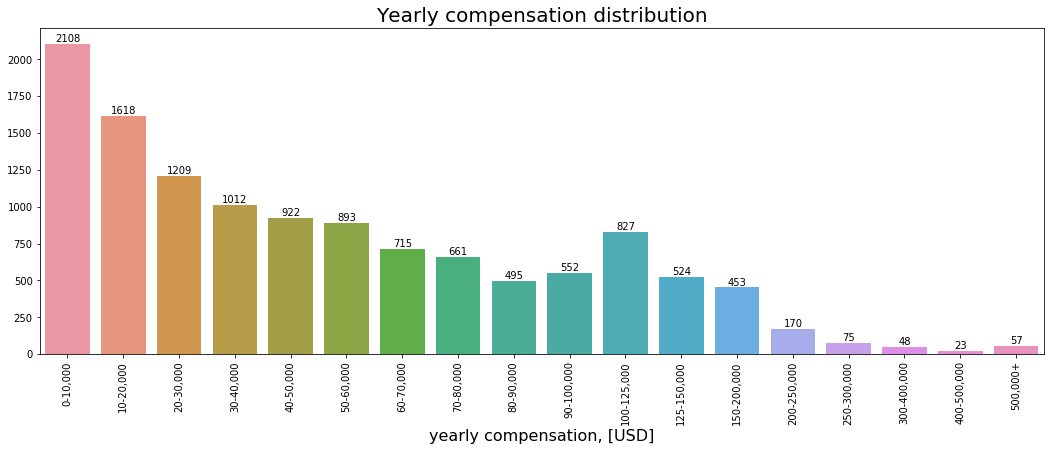

In [62]:
import pandas as pd
import numpy as np

import operator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('multipleChoiceResponses.csv')
df.drop([0],inplace=True)

######
# Start of time column
df['Time from Start to Finish (seconds)'] = df['Time from Start to Finish (seconds)'].apply(int)
# Rejecting those who answered questions too fast:
df = df[df['Time from Start to Finish (seconds)']>60]
# drop "Time" column
df.drop(['Time from Start to Finish (seconds)'],axis=1,inplace=True)
# End of time column
######

def rename_some_salaries(salary):
    if (salary!=salary): return 'unknown'
    elif (salary=='I do not wish to disclose my approximate yearly compensation'): 
        return 'unknown'
    return salary

df['Q9']=df['Q9'].apply(lambda x: rename_some_salaries(x))

# drop those who didn't disclose disclose their salary
df = df[(df['Q9']!='unknown')]

# all valid salary ranges:
all_salaries = ['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000','60-70,000',
                       '70-80,000','80-90,000','90-100,000','100-125,000','125-150,000','150-200,000',
                       '200-250,000','250-300,000','300-400,000','400-500,000','500,000+']

# remove students
df = df[df['Q6']!='Student']
df = df[df['Q7']!='I am a student']

# def: plot salary distribution
def plot_salary_distribution(df,col='Q9',x_label='yearly compensation, [USD]',order=None):
    fig, ax2 = plt.subplots(figsize=(18,6))
    g2 = sns.countplot(x=col,data=df, order=order, ax=ax2)
    g2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    g2.set_title('Yearly compensation distribution',fontsize=20)
    g2.set_ylabel('')
    g2.set_xlabel(x_label,fontsize=16)
    #ax2.set(yscale="log")
    for p in ax2.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax2.annotate(p.get_height(), (x.mean(), y), ha='center', va='bottom')
        
# plot salary distribution
smth0 = plot_salary_distribution(df,order=all_salaries)

#### The dataset used to prepare this plot excludes:
- students
- people for whom it took less than a minute to complete survey
- people who didn't disclose their compensation or for whom it was irrelevant
<br><br>
The peak around '100-125,000' corresponds to the average compensation of USA data scientists while the peak at '0-10,000' indicates a large representation of kagglers from countries with lower salary standards.
<br><br>
To illustrate the country effect, let us plot the yearly compensation distribution for two countries with the largest Kaggle populations and very different salary standards.
<br>
## The Yearly Compensation Distribution for USA vs India

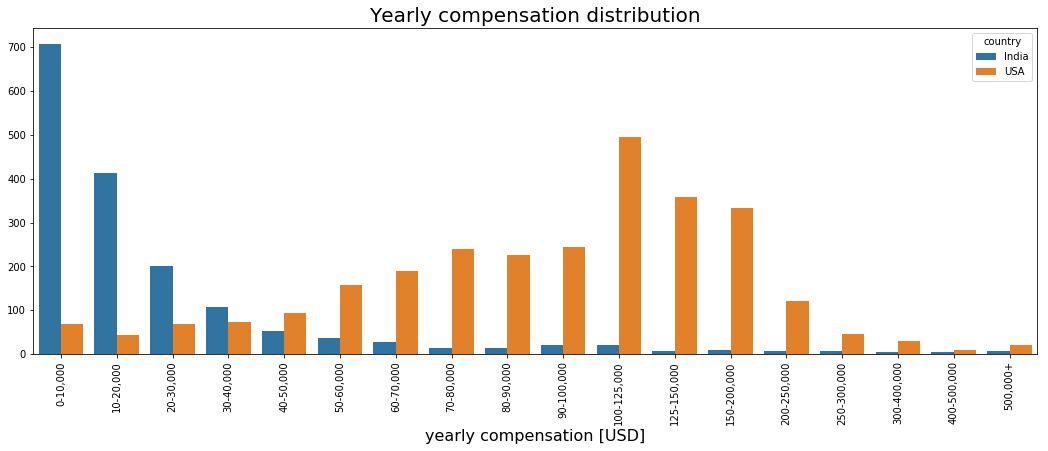

In [66]:
# all valid salary ranges:
all_salaries = ['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000','60-70,000',
                       '70-80,000','80-90,000','90-100,000','100-125,000','125-150,000','150-200,000',
                       '200-250,000','250-300,000','300-400,000','400-500,000','500,000+']
        
# shorten names of some countries
def rename_some_countries(x):
    if (x=='United States of America'): return 'USA'
    if (x=='United Kingdom of Great Britain and Northern Ireland'): return 'United Kingdom'
    if (x=='Iran, Islamic Republic of...'): return 'Iran'
    if (x=='Hong Kong (S.A.R.)'): return 'Hong Kong'
    return x

df['Q3']=df['Q3'].apply(lambda x: rename_some_countries(x))

df['country']=df['Q3']


# distribution over salary ranges
df_for_plot = df[(df['country']=='USA') | (df['country']=='India')]

fig, ax2 = plt.subplots(figsize=(18,6))
g2 = sns.countplot(x='Q9',data=df_for_plot, 
                   order=all_salaries, ax=ax2, hue='country')
smth0 = g2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
smth1 = g2.set_title('Yearly compensation distribution',fontsize=20)
smth2 = g2.set_ylabel('')
smth3 = g2.set_xlabel('yearly compensation [USD]',fontsize=16)

The distribution for USA, while far away from the Gaussian, shows a peak, an increase and a descent. The distribution for India is descending rapidly with a peak somewhere in '0-10,000' USD range.
<br><br>
The ranges are good for such comparison plots and are distributed fairly well for USA, but for more in-depth compensation studies the compensation needs to be quantified. It is essential to measure the difference in typical compensation for USA vs India, or between any other kaggler groups whether it is by an education, experience, main activities at work or a job title.
<br><br>
Let us consider five ways to quantify compensation ranges and draw a conclusion about each one:
- simple enumeration of compensation ranges
- compensation range averages
- compensation range log-averages
- world-wide compensation percentile
- local (country-wide) compensation percentile

<br><br>
(The code to prepare all five quantifications is hidden right here)

In [67]:
import math

# this dict is for 'quantify_average'
dict_averages = {'0-10,000':5000,'10-20,000':15000,'20-30,000':25000,
                '30-40,000':35000,'40-50,000':45000,'50-60,000':55000,
                '60-70,000':65000,'70-80,000':75000,'80-90,000':85000,
                '90-100,000':95000,'100-125,000':112500,'125-150,000':137500,
                '150-200,000':175000,'250-300,000':275000,'200-250,000':225000,
                '300-400,000':350000,'400-500,000':450000,'500,000+':650000}

def quantify_enumerate(x):
    for i in range(1,len(all_salaries)+1):
        if (x==all_salaries[i-1]): return int(i)
    return -100

def quantify_average(x):
    return dict_averages[x]

def quantify_log_average(x):
    return math.log(dict_averages[x])

def order_subset(subset,whole_set):
    ordered = ['']*len(subset)
    i = 0
    for s in whole_set:
        if s in subset:
            ordered[i]=s
            i = i+1
    return ordered

def ranges_to_numerical(df, col_name='Q9', whole_set = all_salaries):
    subset = df[col_name].unique()
    ordered_subset = order_subset(subset,whole_set)
    dict_ranges = dict(df[col_name].value_counts())
    N_tot = df.shape[0]
    N_values = len(ordered_subset)
    N_values1 = len(dict_ranges)
    if (N_values!=N_values1):
        print('In ranges_to_numerical: (N_values!=N_values1)')
        return
    Ns_given_range = [0]*N_values
    percentile = 0
    ordered_dict = {}
    for key in ordered_subset:
        N_i = dict_ranges[key]
        percentile = percentile+100*N_i/N_tot
        ordered_dict[key] = percentile
    return ordered_dict

def quantify_percentile(x, ordered_dict):
    if (x in ordered_dict.keys()):
        return round(ordered_dict[x],3)
    else:
        return -100
    
# calculate world wide percentile
ordered_dict = ranges_to_numerical(df, col_name='Q9', whole_set = all_salaries)
df['world_wide_percentile'] = df['Q9'].apply(lambda x: 
                                             quantify_percentile(x,ordered_dict))

df['enumerate_salary_ranges'] = df['Q9'].apply(lambda x: quantify_enumerate(x))

df['salary_averages'] = df['Q9'].apply(lambda x: quantify_average(x))

df['salary_log_averages'] = df['Q9'].apply(lambda x: quantify_log_average(x))

df_USA = pd.DataFrame(df[df['country']=='USA'])
df_India = pd.DataFrame(df[df['country']=='India'])

# calculate country-wide (local) percentile
ordered_dict_USA = ranges_to_numerical(df_USA, col_name='Q9', whole_set = all_salaries)
df_USA['country_percentile'] = df_USA['Q9'].apply(lambda x: 
                                             quantify_percentile(x,ordered_dict_USA))
ordered_dict_India = ranges_to_numerical(df_India, col_name='Q9', whole_set = all_salaries)
df_India['country_percentile'] = df_India['Q9'].apply(lambda x: 
                                             quantify_percentile(x,ordered_dict_India))

df_USA_India = pd.concat([df_USA,df_India])

## Enumeration of compensation ranges

The simplest way to quantify the compensation ranges is to assign a range number for each range.
<br><br>
'0-10,000' -> 1, '10-20,000' -> 2, etc
<br><br>
If using this way to quantify, a distance between '0-10,000' and '20-30,000' will be the same as the distance between '300-400,000' and '500,000+'
<br><br>
#### The distribution by this quantity is the same as the distribution by original compensation ranges.

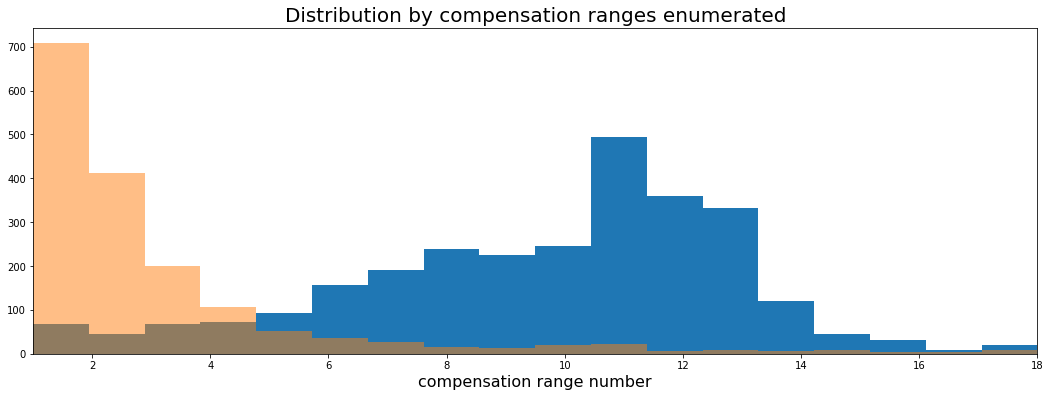

In [78]:
#all_salaries = ['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000','50-60,000','60-70,000',
#                       '70-80,000','80-90,000','90-100,000','100-125,000','125-150,000','150-200,000',
#                       '200-250,000','250-300,000','300-400,000','400-500,000','500,000+']

# enumerate
# the code to enumerate salary ranges is available above
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
p1 = plt.hist(df_USA['enumerate_salary_ranges'],bins=18)
p2 = plt.hist(df_India['enumerate_salary_ranges'],bins=18,alpha=0.5)
p3 = plt.title('Distribution by compensation ranges enumerated',fontsize=20)
p4 = plt.xlabel('compensation range number',fontsize=16)
p5 = plt.xlim(1,18)


## Compensation range average

The average of range is computed as (max+min)/2, thus, for '0-10,000' the average is 5,000.
<br>
The "average" for '500,000+' is taken to be 650,000
<br>
#### Please, note that the average value of two range boundaries DOES NOT correspond to an average compensation of a group of people in a given range. 
<br>
E.g. if we could calculate an average compensation among all respondents in '0-10,000' range, the result could be 3,000 or 2,000 rather than 5,000.
<br><br>
Nevertheless, at the plot below we see how the distributions over range boundaries averages among non-student American and Indian respondents look like. 
<br><br>
For the values about up to 110,000 the distributions by range boundary averages show very similar behavior as enumeration distributions discussed above because up to this point the compensation boundaries are equidistant. Yet once the ranges start to get broader, we have a large number of unpopulated bins.
<br><br>
To make more sense out of this way of quantification, it may worth to combine high salary bins together as it is done in the proposed ranges and normalize all the frequencies to the bin width.

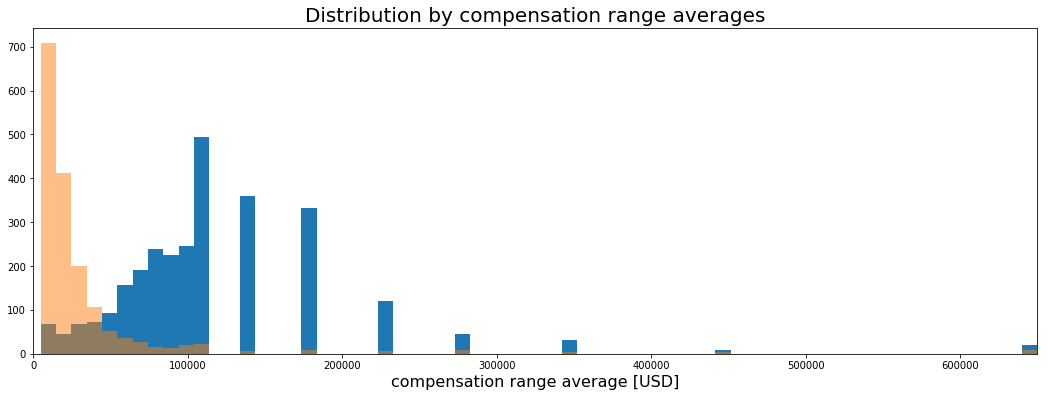

In [70]:
# salary averages
# the code to compute salary range averages is available above
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
p1 = plt.hist(df_USA['salary_averages'],bins=65)
p2 = plt.hist(df_India['salary_averages'],bins=65,alpha=0.5)
p3 = plt.title('Distribution by compensation range averages',fontsize=20)
p4 = plt.xlabel('compensation range average [USD]',fontsize=16)
p5 = plt.xlim(0,650000)

## Compensation range log-average

When the values differ from one another by almost two orders of magnitude, it may make sense to use a logarithmic rather than a linear scale to compare the values between each other.
<br><br>
The plot below shows a rather nice distribution for USA respondents but this time there is a number of unpopulated bins for the Indian kaggles.

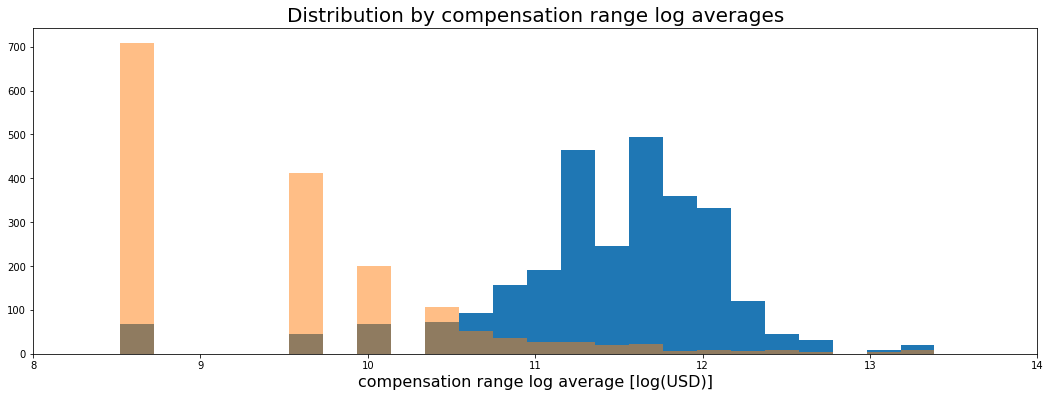

In [71]:
# salary log averages
# the code to compute salary range log-averages is available above
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
p1 = plt.hist(df_USA['salary_log_averages'],bins=24)
p2 = plt.hist(df_India['salary_log_averages'],bins=24,alpha=0.5)
p3 = plt.title('Distribution by compensation range log averages',fontsize=20)
p4 = plt.xlabel('compensation range log average [log(USD)]',fontsize=16)
p5 = plt.xlim(8,14)

## World-wide and local compensation percentile

The last two quantifications I suggest to look at are world-wide and country-wide (local) compensation percentiles. The percentile for bin X is computed as a number of respondents in this and all smaller compensation bins divided over the all respondents in a given dataset.
<br><br>
By this definition, '500,000+' bin correspond to a 1000-world-wide-percentile because this compensation range is the largest possible, while '0-10,000' one corresponds to a 17-world-wide-percentile because 17% of non-students respondents in the analyzed dataset claimed their compensation is within this range. Local percentiles are calculated separately for each country using the same definition.
<br><br>
The distributions by any of these two percentiles do not look any better than the three discussed above

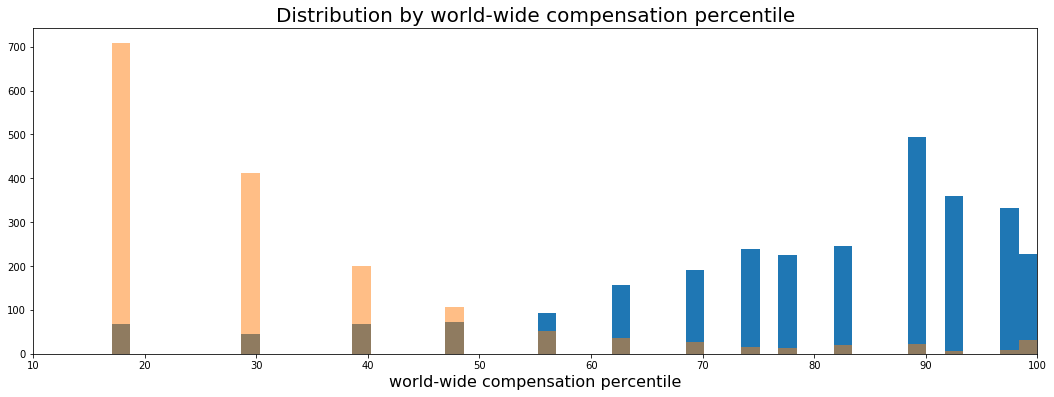

In [49]:
# world-wide percentile
# the code to compute world-wide percentile is available above
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
p1 = plt.hist(df_USA['world_wide_percentile'],bins=50)
p2 = plt.hist(df_India['world_wide_percentile'],bins=50,alpha=0.5)
p3 = plt.title('Distribution by world-wide compensation percentile',fontsize=20)
p4 = plt.xlabel('world-wide compensation percentile',fontsize=16)
p5 = plt.xlim(10,100)

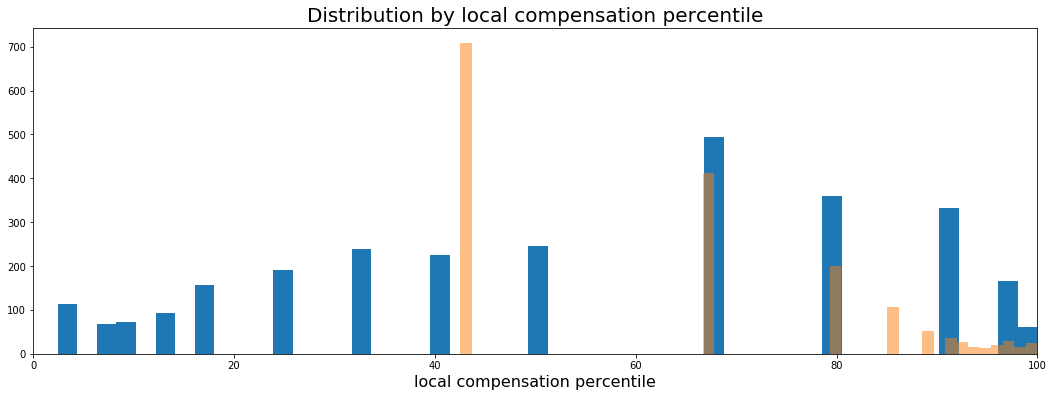

In [51]:
# country percentile
# the code to compute local (country) percentile is available above
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
p1 = plt.hist(df_USA['country_percentile'],bins=50)
p2 = plt.hist(df_India['country_percentile'],bins=50,alpha=0.5)
p3 = plt.title('Distribution by local compensation percentile',fontsize=20)
p4 = plt.xlabel('local compensation percentile',fontsize=16)
p5 = plt.xlim(0,100)

## Conclusion

Five methods to quantify the yearly compensation of USA and Indian kagglers are considered:
- simple enumeration of compensation ranges
- compensation range averages
- compensation range log-averages
- world-wide compensation percentile
- local (country-wide) compensation percentile

<br><br>
Simple enumeration method maps compensation ranges into equidistant numerical values making it possible to create a distribution without unpopulated bin. If you decide to use this quantification method, you should realize the same disrance between ranges may mean a completely difference in terms of the amount of dollars. 
<br><br>
A range boundaries average method maps ranges into numerical values the same way as a simple enumeration method for values of up to \$100K, and may perform well if the intended study consentrates on a group of kaggles who mostly don't exceed this compensation range. Although one may want to note that an average of two range boundaries does not correspond to an average compensation for a given group of people. 
<br><br>
In contrary, a log-average quantification method shows a nicer distribution for people with yearly compensations above \$40K, and might be helpful for work with USA non-student kagglers.
<br><br>
World-wide and country-wide percentile are interesting quantifications to look at but the populated bins are all at a different distance from one another which makes it not a very convinivent quantification for kaggler yearly compensation studies.

- - -
#### Upvote if found the kernel useful and tell me
# How do you quantify compensation ranges?